# HW 1

хотел бы оставить послание и получить ответ на вопрос:

спасибо за разбор в начале второй лекции

первый номер был лёгким в написании, т.к. в прошлом семесре нас на курсе по ML просили SGD на батче написать, но сложным в ходе дальнейших разбирательств. странно, что даже  библиотечные LinearRegressor и SGD дают разные решения. Математически вроде понятно, но получается мы получаем разные решения и интерпретация весов линейной регрессии идёт коту под хвост. А вот второй номер пришлось прям и порисовать и подсматривать на хабре и медиуме



не в ту сторону from J (worst) to D (best)


color_transform = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}  #TODO


print(f"Shape of dataset: {diamonds_df.shape}\n")


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [8]:
diamonds_df = pd.read_csv('diamonds.csv')

In [9]:
print(f"Info about dataset: {diamonds_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
Info about dataset: None


In [10]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


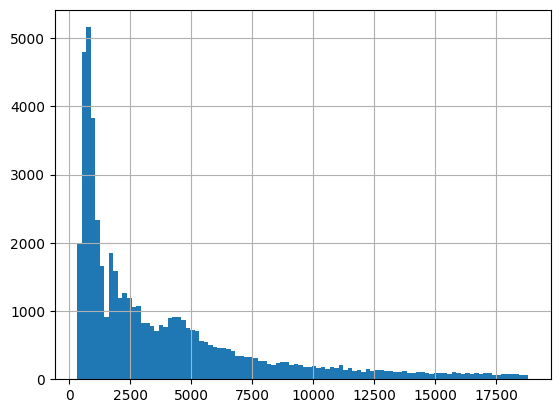

In [11]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid()

# Подготовка данных

In [12]:
diamonds_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [13]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [14]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transform = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}  #TODO

In [15]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transform.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

## ускоряем
```py
diamonds_df['color'] = diamonds_df['color'].map(color_transform)
diamonds_df['color'] = diamonds_df['color'].replace(color_transform)
```

In [16]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* MinMaxScaler - "обучается" ТОЛЬКО на train данных И преобразует их
* transform() - только преобразует test данные (без повторного "обучения")

# Обучаем модель линейной регрессии

In [19]:
reg = LinearRegression().fit(X_train, y_train)

In [20]:
y_pred = reg.predict(X_test)

In [21]:
score = r2_score(y_pred, y_test)

* y_pred - массив предсказаний (shape (n_samples, 1))
* .reshape(1, -1) - преобразует в массив формы (1, n_samples)
* [0] - берет первую (и единственную) строку, получается 1D массив

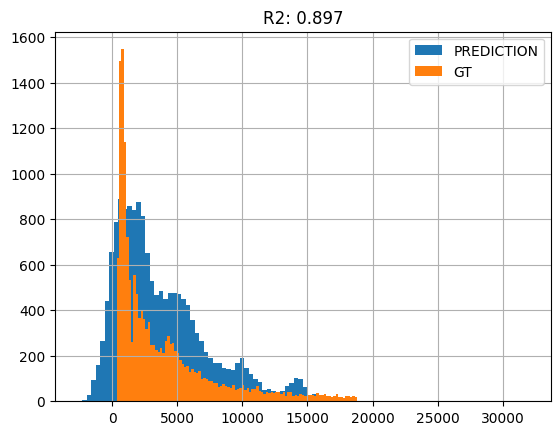

In [22]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')  # ground truth
plt.legend()
plt.grid()

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [23]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        pass

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        pass

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        pass

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        pass


In [24]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000, penalty='l2', alpha=0.0001):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
            penalty (str): Тип регуляризации ('l2' или None)
            alpha (float): Коэффициент регуляризации
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.penalty = penalty
        self.alpha = alpha
        
        # обучаемые_ параметры модели 
        self.coef_ = None  # initialization in fit(), depend on input data
        self.intercept_ = .0  # intercept=True

    def _get_penalty_grad(self):
        """
        Вычисляет градиент регуляризации
        """
        if self.penalty == 'l2':
            return 2 * self.alpha * self.coef_
        elif self.penalty is None:
            return np.zeros_like(self.coef_)

    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_samples, n_features = X.shape
        
        # приводим y к нужной форме, иначе broadcasting и memory error
        if y.ndim == 2:
            y = y.ravel()
            
        # Init
        self.coef_ = np.zeros(n_features)
        self.intercept_ = .0
        
        # GD
        for _ in range(self.n_iter):
            y_pred = self.predict(X)
            error = y_pred - y
            # не забываем, что bias НЕ регуляризуем
            grad_w = (2 / n_samples) * (X.T @ error) + self._get_penalty_grad()
            grad_b = (2 / n_samples) * np.sum(error)
            
            self.coef_ += -self.learning_rate * grad_w
            self.intercept_ += -self.learning_rate * grad_b

    def predict(self, X):
        """
        Получение предсказаний обученной (или ещё нет) модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return X @ self.coef_ + self.intercept_

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return {
            'coef_': self.coef_,
            'intercept_': self.intercept_
        }

#### Тестируем самописную реализацию LinearRegressorGD

In [25]:
self_regr = LinearRegressorGD(learning_rate=0.01, n_iter=1000, penalty='l2', alpha=0.001)
self_regr.fit(X_train, y_train)

y_pred_self = self_regr.predict(X_test)

# приводим y_test к правильной форме для r2_score
y_test_flat = y_test.ravel() if y_test.ndim == 2 else y_test

self_score = r2_score(y_test_flat, y_pred_self)
print(f"R2 score (самописная реализация): {self_score:.4f}")
print(f"R2 score (sklearn): {score:.4f}")

R2 score (самописная реализация): 0.4594
R2 score (sklearn): 0.8977


In [26]:
self_regr = LinearRegressorGD(learning_rate=0.01, n_iter=10000, penalty=None)
self_regr.fit(X_train, y_train)

y_pred_self = self_regr.predict(X_test)

y_test_flat = y_test.ravel() if y_test.ndim == 2 else y_test

self_score = r2_score(y_test_flat, y_pred_self)
print(f"R2 score (самописная реализация): {self_score:.4f}")
print(f"R2 score (sklearn): {score:.4f}")

R2 score (самописная реализация): 0.8766
R2 score (sklearn): 0.8977


In [27]:
# Grid Search для поиска оптимальных гиперпараметров
from sklearn.model_selection import ParameterGrid

param_grid = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'n_iter': [1000, 5000, 10000, 20000],
    'penalty': [None, 'l2'],
    'alpha': [0.0001, 0.001, 0.01]
}

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

best_score = -np.inf
best_params = {}
all_results = []

print(f"{len(list(ParameterGrid(param_grid)))} комбинаций параметров")

for params in ParameterGrid(param_grid):
    model = LinearRegressorGD(**params)
    
    model.fit(X_train_split, y_train_split)
    
    y_pred_val = model.predict(X_val_split)
    val_score = r2_score(y_val_split.ravel(), y_pred_val)
    
    result = {**params, 'val_score': val_score}
    all_results.append(result)
    
    if val_score > best_score:
        best_score = val_score
        best_params = params.copy()

print(f"\nЛУЧШИЕ ПАРАМЕТРЫ:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

print(f"Лучший validation R²: {best_score:.4f}")

# Обучаем финальную модель на всех тренировочных данных
final_model = LinearRegressorGD(**best_params)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
final_test_score = r2_score(y_test.ravel(), y_pred_final)

print(f"Финальный test R²:    {final_test_score:.4f}")
print(f"sklearn R²:           {score:.4f}")
print(f"Разница:              {abs(score - final_test_score):.4f}")

print(f"\n5 лучших комбинаций:")
sorted_results = sorted(all_results, key=lambda x: x['val_score'], reverse=True)
for i, result in enumerate(sorted_results[:5], 1):
    print(f"{i}. R²={result['val_score']:.4f} | "
          f"lr={result['learning_rate']}, iter={result['n_iter']}, "
          f"penalty={result['penalty']}, alpha={result['alpha']}")

120 комбинаций параметров


KeyboardInterrupt: 

In [28]:
# Финальная модель с оптимальными параметрами

optimal_regr = LinearRegressorGD(learning_rate=0.1, n_iter=20000, penalty=None)
optimal_regr.fit(X_train, y_train)

y_pred_optimal = optimal_regr.predict(X_test)
optimal_score = r2_score(y_test.ravel(), y_pred_optimal)

print(f"R2 score (оптимальная реализация): {optimal_score:.4f}")
print(f"R2 score (sklearn):               {score:.4f}")
print(f"Разница:                          {abs(score - optimal_score):.4f}")

# Сравнение весов
print(f"\nСравнение весов:")
print(f"Наша модель: {optimal_regr.coef_}")
print(f"sklearn:     {reg.coef_[0]}")

print(f"\nСравнение intercept:")
print(f"Наша модель: {optimal_regr.intercept_:.4f}")
print(f"sklearn:     {reg.intercept_[0]:.4f}")

R2 score (оптимальная реализация): 0.9024
R2 score (sklearn):               0.8977
Разница:                          0.0047

Сравнение весов:
Наша модель: [39535.21508708   559.23834658 -1907.31858687  3672.95704736
  -470.46887769  -640.05883786  2225.9252353    600.6958238
   348.17004574]
sklearn:     [51148.25187875   472.47472887 -1974.69216261  3530.7720608
 -2905.6766965  -1449.95988869 -8721.95669848  1098.0443115
  -324.00144698]

Сравнение intercept:
Наша модель: -3042.6669
sklearn:     2986.5493


СРАВНЕНИЕ: LinearRegressorGD vs sklearn LinearRegression


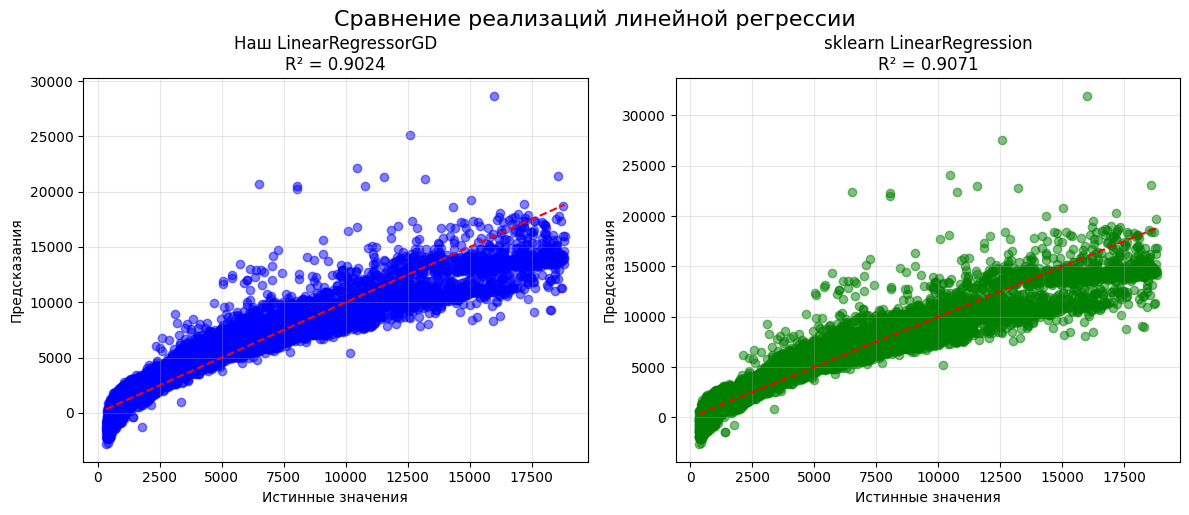

y_pred_our.shape: (16182,)
y_pred_sklearn.shape: (16182,)
residuals_our.shape: (16182,)
residuals_sklearn.shape: (16182,)


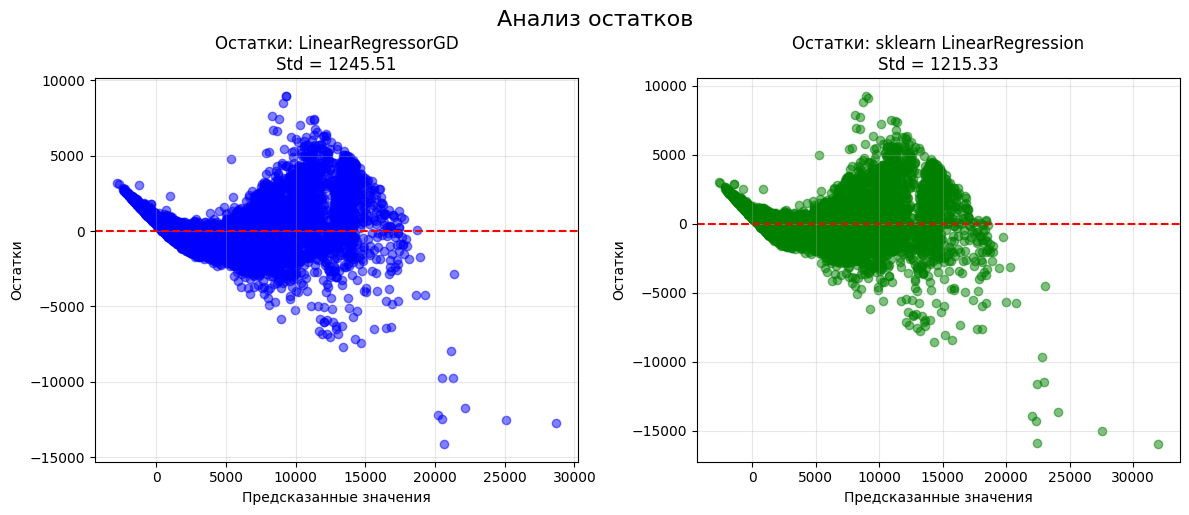


Сравнение весов:
Наша модель: [39535.21508708   559.23834658 -1907.31858687  3672.95704736
  -470.46887769  -640.05883786  2225.9252353    600.6958238
   348.17004574]
sklearn:     [51148.25187875   472.47472887 -1974.69216261  3530.7720608
 -2905.6766965  -1449.95988869 -8721.95669848  1098.0443115
  -324.00144698]

Сравнение intercept:
Наша модель: -3042.6669
sklearn:     2986.5493


In [29]:
# Визуализация сравнения нашей реализации с sklearn
print("СРАВНЕНИЕ: LinearRegressorGD vs sklearn LinearRegression")
print("=" * 60)

y_pred_our = optimal_regr.predict(X_test)

y_test_flat = y_test.ravel() if y_test.ndim == 2 else y_test
y_pred_sklearn = reg.predict(X_test).ravel()  # Приводим к 1D сразу

r2_our = r2_score(y_test_flat, y_pred_our)
r2_sklearn = r2_score(y_test_flat, y_pred_sklearn)

plt.figure(figsize=(12, 5))

# График 1: реализация LinearRegressorGD
plt.subplot(1, 2, 1)
plt.scatter(y_test_flat, y_pred_our, alpha=0.5, color='blue')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказания')
plt.title(f'Наш LinearRegressorGD\nR² = {r2_our:.4f}')
plt.grid(True, alpha=0.3)

# График 2: sklearn LinearRegression
plt.subplot(1, 2, 2)
plt.scatter(y_test_flat, y_pred_sklearn, alpha=0.5, color='green')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказания')
plt.title(f'sklearn LinearRegression\nR² = {r2_sklearn:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Сравнение реализаций линейной регрессии', fontsize=16, y=1.02)
plt.show()

# график - остатки (residuals)
plt.figure(figsize=(12, 5))

residuals_our = y_test_flat - y_pred_our
residuals_sklearn = y_test_flat - y_pred_sklearn


print(f"y_pred_our.shape: {y_pred_our.shape}")
print(f"y_pred_sklearn.shape: {y_pred_sklearn.shape}")
print(f"residuals_our.shape: {residuals_our.shape}")
print(f"residuals_sklearn.shape: {residuals_sklearn.shape}")

# массивы одномерные?
y_pred_sklearn_flat = y_pred_sklearn.ravel() if y_pred_sklearn.ndim > 1 else y_pred_sklearn
residuals_sklearn_flat = residuals_sklearn.ravel() if residuals_sklearn.ndim > 1 else residuals_sklearn

plt.subplot(1, 2, 1)
plt.scatter(y_pred_our, residuals_our, alpha=0.5, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title(f'Остатки: LinearRegressorGD\nStd = {np.std(residuals_our):.2f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_sklearn_flat, residuals_sklearn_flat, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title(f'Остатки: sklearn LinearRegression\nStd = {np.std(residuals_sklearn_flat):.2f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Анализ остатков', fontsize=16, y=1.02)
plt.show()

# Сравнение весов
print(f"\nСравнение весов:")
print(f"Наша модель: {optimal_regr.coef_}")
print(f"sklearn:     {reg.coef_[0]}")

print(f"\nСравнение intercept:")
print(f"Наша модель: {optimal_regr.intercept_:.4f}")
print(f"sklearn:     {reg.intercept_[0]:.4f}")


# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации на внутренних слоях нужно использовать Sigmoid, а на выходе - линейную активацию f(x) = x

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

## Математика Backpropagation

### Основная идея
Алгоритм обратного распространения ошибки (backpropagation) используется для вычисления градиентов функции потерь по всем параметрам нейронной сети.

###  Архитектура сети
Рассмотрим MLP с L слоями:
- **Входной слой**: $a^{(0)} = x$ (размер: $n_0 \times m$)
- **Скрытые слои**: $l = 1, 2, ..., L-1$ (размеры: $n_l \times m$)  
- **Выходной слой**: $l = L$ (размер: $n_L \times m$)

где $m$ - количество примеров в батче.

### Forward Pass
Для каждого слоя $l$:

$$z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}$$

$$a^{(l)} = \begin{cases}
\sigma(z^{(l)}) & \text{если } l < L \text{ (sigmoid для скрытых слоев)} \\
z^{(l)} & \text{если } l = L \text{ (линейная активация для выхода)}
\end{cases}$$

где:
- $W^{(l)}$ - матрица весов размера $(n_l \times n_{l-1})$
- $b^{(l)}$ - вектор смещений размера $(n_l \times 1)$
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ - сигмоидальная функция

###  Backward Pass

#### * Функция потерь (MSE для регрессии)
$$\mathcal{L} = \frac{1}{2m} \sum_{i=1}^{m} (a^{(L)}_i - y_i)^2$$

#### * Градиент по выходному слою
Для выходного слоя $L$ (линейная активация):
$$\frac{\partial \mathcal{L}}{\partial z^{(L)}} = \frac{1}{m}(a^{(L)} - y) = \delta^{(L)}$$

#### * Обратное распространение ошибки
Для слоя $l$ (от $L-1$ до $1$):
$$\delta^{(l)} = (W^{(l+1)})^T \delta^{(l+1)} \odot \sigma'(z^{(l)})$$

где $\odot$ - поэлементное произведение (Hadamard product).

#### * Производная сигмоиды
$$\sigma'(z) = \sigma(z)(1 - \sigma(z))$$

#### * Градиенты по параметрам
Для каждого слоя $l$:

**Градиент по весам:**
$$\frac{\partial \mathcal{L}}{\partial W^{(l)}} = \frac{1}{m} \delta^{(l)} (a^{(l-1)})^T$$

**Градиент по смещениям:**
$$\frac{\partial \mathcal{L}}{\partial b^{(l)}} = \frac{1}{m} \sum_{i=1}^{m} \delta^{(l)}_i$$

### Обновление параметров (Gradient Descent)
$$W^{(l)} := W^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial W^{(l)}}$$
$$b^{(l)} := b^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial b^{(l)}}$$

где $\alpha$ - learning rate.

### Размерности матриц
- $W^{(l)}$: $(n_l \times n_{l-1})$
- $b^{(l)}$: $(n_l \times 1)$
- $z^{(l)}, a^{(l)}$: $(n_l \times m)$
- $\delta^{(l)}$: $(n_l \times m)$
- $\frac{\partial \mathcal{L}}{\partial W^{(l)}}$: $(n_l \times n_{l-1})$
- $\frac{\partial \mathcal{L}}{\partial b^{(l)}}$: $(n_l \times 1)$

### Алгоритм Backpropagation
1. **Forward pass**: вычисляем $z^{(l)}, a^{(l)}$ для всех слоев
2. **Вычисляем $\delta^{(L)}$** для выходного слоя
3. **Backpropagate**: вычисляем $\delta^{(l)}$ для $l = L-1, L-2, ..., 1$
4. **Вычисляем градиенты**: $\frac{\partial \mathcal{L}}{\partial W^{(l)}}, \frac{\partial \mathcal{L}}{\partial b^{(l)}}$
5. **Обновляем параметры**: используя gradient descent

### Ключевые особенности
- **Chain rule**: основа backpropagation
- **Вычислительная эффективность**: O(параметры) за один проход
- **Векторизация**: операции с матрицами вместо циклов
- **Нормальная инициализация**: простая инициализация весов из N(0,1)

### Конкретный пример: сеть 2→3→1

Рассмотрим простую сеть с архитектурой: **2 входа → 3 нейрона → 1 выход**

#### Архитектура:
- Слой 0 (вход): $a^{(0)} \in \mathbb{R}^{2 \times m}$
- Слой 1 (скрытый): $a^{(1)} \in \mathbb{R}^{3 \times m}$, активация sigmoid
- Слой 2 (выход): $a^{(2)} \in \mathbb{R}^{1 \times m}$, линейная активация

#### Параметры:
- $W^{(1)} \in \mathbb{R}^{3 \times 2}$, $b^{(1)} \in \mathbb{R}^{3 \times 1}$
- $W^{(2)} \in \mathbb{R}^{1 \times 3}$, $b^{(2)} \in \mathbb{R}^{1 \times 1}$

#### Forward Pass:
1. $z^{(1)} = W^{(1)} a^{(0)} + b^{(1)}$ → размер $(3 \times m)$
2. $a^{(1)} = \sigma(z^{(1)})$ → размер $(3 \times m)$
3. $z^{(2)} = W^{(2)} a^{(1)} + b^{(2)}$ → размер $(1 \times m)$  
4. $a^{(2)} = z^{(2)}$ → размер $(1 \times m)$ (выход сети)

#### Backward Pass:

**Шаг 1**: Градиент по выходному слою
$$\delta^{(2)} = \frac{1}{m}(a^{(2)} - y) \quad \text{размер: } (1 \times m)$$

**Шаг 2**: Градиенты параметров выходного слоя
$$\frac{\partial \mathcal{L}}{\partial W^{(2)}} = \frac{1}{m} \delta^{(2)} (a^{(1)})^T \quad \text{размер: } (1 \times 3)$$
$$\frac{\partial \mathcal{L}}{\partial b^{(2)}} = \frac{1}{m} \sum_{i=1}^{m} \delta^{(2)}_i \quad \text{размер: } (1 \times 1)$$

**Шаг 3**: Обратное распространение к скрытому слою
$$\delta^{(1)} = (W^{(2)})^T \delta^{(2)} \odot \sigma'(z^{(1)}) \quad \text{размер: } (3 \times m)$$

где $\sigma'(z^{(1)}) = \sigma(z^{(1)}) \odot (1 - \sigma(z^{(1)}))$

**Шаг 4**: Градиенты параметров скрытого слоя
$$\frac{\partial \mathcal{L}}{\partial W^{(1)}} = \frac{1}{m} \delta^{(1)} (a^{(0)})^T \quad \text{размер: } (3 \times 2)$$
$$\frac{\partial \mathcal{L}}{\partial b^{(1)}} = \frac{1}{m} \sum_{i=1}^{m} \delta^{(1)}_i \quad \text{размер: } (3 \times 1)$$

#### Проверка размерностей:
- $(W^{(2)})^T$: $(3 \times 1)$, $\delta^{(2)}$: $(1 \times m)$ → произведение: $(3 \times m)$ 
- $\delta^{(1)}$: $(3 \times m)$, $(a^{(0)})^T$: $(m \times 2)$ → произведение: $(3 \times 2)$ 
- Все размерности совпадают с размерами соответствующих параметров!

####  Псевдокод:
```python
# Forward pass
z1 = W1 @ X + b1          # (3, m)
a1 = sigmoid(z1)          # (3, m) 
z2 = W2 @ a1 + b2         # (1, m)
a2 = z2                   # (1, m) - выход

# Backward pass  
delta2 = (a2 - y) / m     # (1, m)
dW2 = delta2 @ a1.T       # (1, 3)
db2 = delta2.sum(axis=1, keepdims=True)  # (1, 1)

delta1 = W2.T @ delta2 * sigmoid_derivative(z1)  # (3, m)
dW1 = delta1 @ X.T        # (3, 2)  
db1 = delta1.sum(axis=1, keepdims=True)  # (3, 1)

# Update parameters
W2 -= learning_rate * dW2
b2 -= learning_rate * db2
W1 -= learning_rate * dW1  
b1 -= learning_rate * db1
```

### Почему мы не сохраняем градиенты по входам?

**Отличный вопрос!** Давайте разберем разницу между градиентами по весам и градиентами по входам.

#### Что мы вычисляем в backpropagation:

**1. Градиенты по параметрам (веса и смещения):**
- $\frac{\partial \mathcal{L}}{\partial W^{(l)}}$ - нужны для обновления весов
- $\frac{\partial \mathcal{L}}{\partial b^{(l)}}$ - нужны для обновления смещений
- **Цель**: изменить параметры модели для минимизации функции потерь

**2. Градиенты по активациям/входам:**
- $\frac{\partial \mathcal{L}}{\partial a^{(l)}}$ - градиенты по активациям слоя
- $\frac{\partial \mathcal{L}}{\partial x}$ - градиенты по входным данным
- **Цель**: промежуточные вычисления для chain rule

####  Для backpropagation:

```python
# Мы вычисляем градиенты по активациям, но НЕ сохраняем их:
da_prev = np.dot(self.weights[i].T, dz)  # ← это и есть градиент по активациям!

# Но сохраняем только градиенты по параметрам:
gradients_w.append(dW)  # градиенты по весам
gradients_b.append(db)  # градиенты по смещениям
```

#### Математически:

**Для обновления параметров нужно:**
$$W^{(l)} := W^{(l)} - \alpha \frac{\partial \mathcal{L}}{\partial W^{(l)}}$$

**Градиенты по активациям используются только для chain rule:**
$$\frac{\partial \mathcal{L}}{\partial W^{(l)}} = \frac{\partial \mathcal{L}}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial W^{(l)}} = \delta^{(l)} (a^{(l-1)})^T$$

где $\delta^{(l)} = \frac{\partial \mathcal{L}}{\partial z^{(l)}}$ включает в себя все промежуточные градиенты.

#### Исключения, когда градиенты по входам нужны:

**1. Adversarial examples:**
```python
# Хотим изменить входное изображение для атаки
x_adv = x + ε * sign(∇_x L(x, y))
```

**2. Интерпретируемость (saliency maps):**
```python
# Какие пиксели важны для предсказания?
importance = |∇_x L(x, y)|
```

**3. Neural style transfer:**
```python
# Изменяем изображение, а не веса сети
x := x - α * ∇_x L(content + style)
```

#### Вывод:
В обычном обучении нейронных сетей нас интересуют только **градиенты по параметрам**, так как мы оптимизируем именно их. Градиенты по входам - это промежуточные вычисления, которые используются только для chain rule и обычно не сохраняются.

In [30]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        pass

    def backward(self, X, y):
        """
        Реализация backward pass

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        pass

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        pass

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        pass


## дописать

In [ ]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        
        # обучаемые параметры (инициализируются в fit)
        self.weights = []
        self.biases = []
        self.n_layers = None
        
        # для сохранения промежуточных значений при forward pass
        self.activations = []
        self.z_values = []

    def _sigmoid(self, z):
        """
        Сигмоидальная функция активации (с защитой от overflow)
        """
        # чтобы избежать переполнения экспоненты при больших z
        # np.exp(-z) безопасно для z ∈ [-500, 500]
        z = np.clip(z, -500.0, 500.0)
        return 1.0 / (1.0 + np.exp(-z))
    
    def _sigmoid_derivative(self, z):
        """
        Производная сигмоидальной функции
        """
        sigmoid_z = self._sigmoid(z)
        return sigmoid_z * (1 - sigmoid_z)
    
    def _initialize_weights(self, input_size, output_size):
        """
        Инициализация весов из нормального распределения
        """
        # граф вычислений: input -> hidden_layers -> output
        layer_sizes = [input_size] + list(self.hidden_layer_sizes) + [output_size]
        self.n_layers = len(layer_sizes) - 1
        
        self.weights = []
        self.biases = []
        
        for i in range(self.n_layers):
            W = np.random.randn(layer_sizes[i + 1], layer_sizes[i])
            b = np.random.randn(layer_sizes[i + 1], 1)
            
            self.weights.append(W)
            self.biases.append(b)

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        # приводим X к нужной форме (features, samples)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        elif X.shape[0] != self.weights[0].shape[1]:
            X = X.T
            
        self.activations = [X]
        self.z_values = []
        
        for i in range(self.n_layers):
            # Linear: z = W*a + b
            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z_values.append(z)
            
            # применяем функцию активации
            if i < self.n_layers - 1:
                # sigmoid для hidden
                a = self._sigmoid(z)
            else:
                # линейная активация для выходного слоя
                a = z
            
            self.activations.append(a)
            
        return self.activations[-1]

    def backward(self, X, y):
        """
        Реализация backward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        # приводим y к нужной форме
        if y.ndim == 1:
            y = y.reshape(1, -1)
        elif y.shape[0] != 1:
            y = y.T
            
        n_in = X.shape[1] if X.ndim > 1 else X.shape[0]  # кол-во примеров
        
        # вычисляем градиенты методом обратного распространения
        gradients_w = []
        gradients_b = []
        
        # начинаем с выходного слоя
        # dL/dz для выходного слоя (линейная активация)
        dz = self.activations[-1] - y  # (output_size, m)
        
        # Идем от последнего слоя к первому
        for i in range(self.n_layers - 1, -1, -1):
            dW = (1 / n_in) * np.dot(dz, self.activations[i].T)
            db = (1 / n_in) * np.sum(dz, axis=1, keepdims=True)
            
            gradients_w.append(dW)
            gradients_b.append(db)
            
            # если не первый слой, вычисляем dz для предыдущего слоя
            if i > 0:
                # град по активациям предыдущего слоя
                da_prev = np.dot(self.weights[i].T, dz)
                # град по z предыдущего слоя (через производную sigmoid)
                dz = da_prev * self._sigmoid_derivative(self.z_values[i-1])
        
        # возвращаем градиенты в правильном порядке (от первого слоя к последнему)
        return gradients_w[::-1], gradients_b[::-1]

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        if y.ndim == 2 and y.shape[1] == 1:
            y = y.ravel()
        
        n_samples, n_features = X.shape
        output_size = 1  # для регрессии
        
        self._initialize_weights(n_features, output_size)
        
        # X к форме (features, samples) для удобства вычислений
        X_T = X.T
        
        for epoch in range(self.n_iter):
            # forward pass
            predictions = self.forward(X_T)
            
            # backward pass
            gradients_w, gradients_b = self.backward(X_T, y)
            
            # обновление параметров
            for i in range(self.n_layers):
                self.weights[i] -= self.learning_rate * gradients_w[i]
                self.biases[i] -= self.learning_rate * gradients_b[i]

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        X_T = X.T
        predictions = self.forward(X_T)
        
        # возврат к форме (samples,)
        return predictions.ravel()

## Создаем и обучаем модель


In [32]:
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(50, 30),  # два скрытых слоя
    learning_rate=0.01,
    n_iter=1000
)

mlp_regressor.fit(X_train, y_train.ravel())

y_pred_mlp = mlp_regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_mlp = r2_score(y_test.ravel(), y_pred_mlp)
mse_mlp = mean_squared_error(y_test.ravel(), y_pred_mlp)
mae_mlp = mean_absolute_error(y_test.ravel(), y_pred_mlp)


print(f"R2 score: {r2_mlp}")
print(f"MSE:      {mse_mlp}")
print(f"MAE:      {mae_mlp}")


R2 score: -0.00021177169148245412
MSE:      15897462.585870316
MAE:      3040.5087714883566


## почитать про инициализации
**Xavier инициализация** → стабильные градиенты в начале
## exp over
возможно как в софтмакс делаить на максимум всё